In [1]:
import numpy as np
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
import glob
import cv2
import matplotlib.pyplot as plt

In [2]:
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from typing import List
import pprint
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def display_images(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))
    
    axes[0].imshow(image1)
    axes[0].axis('off')
    
    axes[1].imshow(image2)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

In [6]:
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        new_image = resize(image, new_shape)
        images_list.append(new_image)
    return asarray(images_list)

In [7]:
# d^2 = ||mu_1 – mu_2||^2 + Tr(C_1 + C_2 – 2*sqrt(C_1*C_2))

In [11]:
def calculate_fid(mod, images1, images2, real, generated):
 act1 = mod.predict(images1)
 act2 = mod.predict(images2)
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 ssdiff = np.sum((mu1 - mu2)**2.0)
 covmean = sqrtm(sigma1.dot(sigma2))
 if iscomplexobj(covmean):
        covmean = covmean.real
 fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
 print("FID SCORE FOR REAL AND GENERATED IMAGE IS: ")
 print("%.2f" % fid)
 display_images(real, generated)

Prepared (256, 256) (256, 256)
Scaled (256, 256, 256, 3) (256, 256, 256, 3)
8/8 [==============================] - 39s 5s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
6.36


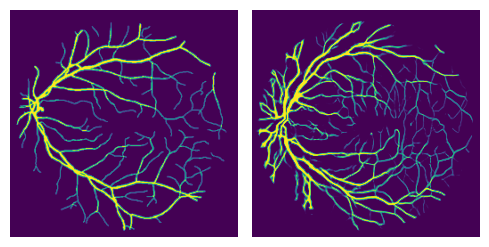

In [12]:
#FOR FID COMPUTATION
images1 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual1.png")
images2 = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel01.png")
real = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual1.png")
generated = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel01.png")
print('Prepared', images1.shape, images2.shape)
images1 = np.array(images1.astype('float32'))
images2 = np.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)

Prepared (256, 256, 4) (256, 256)
Scaled (256, 256, 256, 3) (256, 256, 256, 3)
8/8 [==============================] - 44s 6s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
19.50


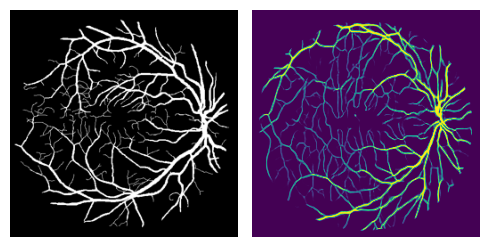

In [ ]:
images1 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual4.png")
images2 = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel04.png")
real = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual4.png")
generated = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel04.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)

Prepared (256, 256, 4) (256, 256)
Scaled (256, 256, 256, 3) (256, 256, 256, 3)
8/8 [==============================] - 44s 6s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
19.24


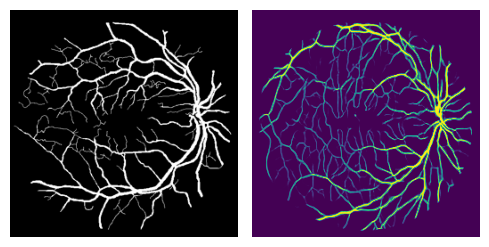

In [ ]:
images1 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual5.png")
images2 = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel04.png")
real = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual5.png")
generated = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel04.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)

Prepared (256, 256) (256, 256)
Scaled (256, 256, 256, 3) (256, 256, 256, 3)
8/8 [==============================] - 45s 6s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
9.21


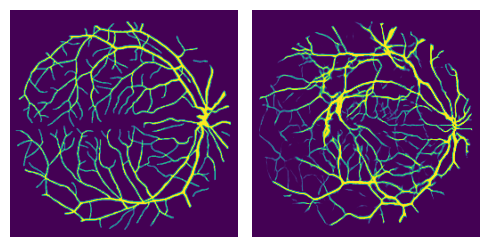

In [ ]:
images1 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual16.png")
images2 = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel07.png")
real = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual16.png")
generated = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel07.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)

Prepared (256, 256) (256, 256)
Scaled (256, 256, 256, 3) (256, 256, 256, 3)
8/8 [==============================] - 43s 5s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
8.68


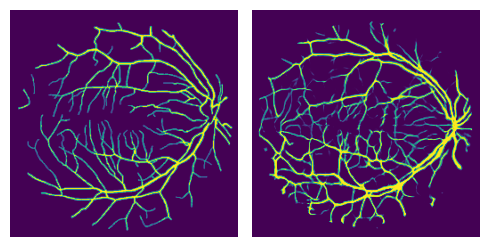

In [ ]:
images1 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual18.png")
images2 = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel20.png")
real = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual18.png")
generated = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel20.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)

Prepared (256, 256) (256, 256)
Scaled (256, 256, 256, 3) (256, 256, 256, 3)
8/8 [==============================] - 42s 5s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
9.18


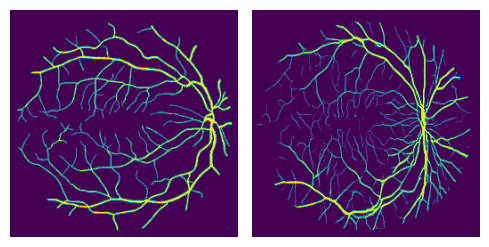

In [ ]:
images1 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual20.png")
images2 = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel15.png")
real = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual20.png")
generated = mpimg.imread("/content/drive/MyDrive/Vessel/Vessel/Masked_Vessel15.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)

Prepared (256, 256) (256, 256)
Scaled (256, 256, 256, 3) (256, 256, 256, 3)
8/8 [==============================] - 45s 6s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
-0.00


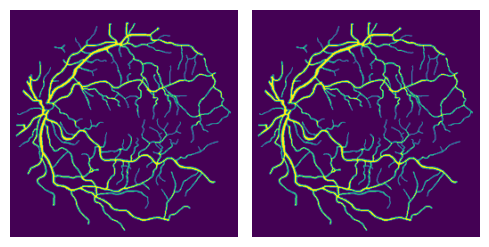

In [ ]:
images1 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual19.png")
images2 = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual19.png")
real = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual19.png")
generated = mpimg.imread("/content/drive/MyDrive/DRIVE/train/manual_1st/manual_1st/manual19.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)